In [ ]:
!unzip /content/IDCIAv2.zip

unzip:  cannot find or open /content/IDCIAv2.zip, /content/IDCIAv2.zip.zip or /content/IDCIAv2.zip.ZIP.


In [ ]:

import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split




In [ ]:
class IDCIAv2(Dataset):
    def __init__(self, image_files, csv_files, transform=None):
        self.image_files = image_files
        self.csv_files = csv_files
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        csv_path = self.csv_files[idx]


        image = imread(image_path)
        # Read the csv file and get the number of cells in the image
        ground_truth = pd.read_csv(csv_path)
        cell_count = ground_truth.shape[0]

        if self.transform:
            image = self.transform(image)

        return image, cell_count

# Data preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
import csv
import random

# Load image and CSV file paths
image_dir = '/content/IDCIAv2/images'
csv_dir = '/content/IDCIAv2/ground_truth'
weights = {}
count_dict = {}
image_files = [file for file in os.listdir(image_dir) if file.endswith('.tiff')]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)

    # Assuming CSV files have the same name as image files but with a different extension
    csv_file_path = os.path.join(csv_dir, f"{os.path.splitext(image_file)[0]}.csv")

    # Calculate weight based on the number of rows in the CSV file
    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        row_count = sum(1 for row in csv_reader) - 1
        #if row_count == 0:
        #  row_count = 1
        count_dict[image_file] = row_count
        #print ("row_count:", row_count)

# Sort count_dict by counts in descending order
sorted_counts = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

# Assign weights based on the rank of counts
for rank, (image_file, _) in enumerate(sorted_counts):
    weights[image_file] = rank + 1  # Adding 1 to avoid zero weight


    # Assign the weight to the image file
    # weights[image_file] = 1/row_count

# Normalize weights to sum up to 1
total_weight = sum(weights.values())
probabilities = [weight / total_weight for weight in weights.values()]

# Choose images based on probabilities
final_image_list = random.choices(image_files, probabilities, k=150)  # Adjust 'k' as needed

# Print or use the final list of chosen images
print("Final Image List:", final_image_list)
#print (weights)
#print (count_dict[final_image_list])

print(final_image_list.count)


Final Image List: ['220909_GFP-AHPC_D_GFAP_F7_DAPI_ND1_20x.tiff', '220812_GFP-AHPC_A_GFAP_F5_DAPI_ND1_20x.tiff', '220912_GFP-AHPC_A_TuJ1_F8_DAPI_ND1_20x.tiff', '220909_GFP-AHPC_C_GFAP_F4_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_C_Nestin_F5_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_C_Ki67_F3_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_A_MAP2ab_F4_DAPI_ND1_20x.tiff', '220912_GFP-AHPC_C_Map2AB_F2_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_D_Nestin_F6_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_A_Ki67_F4_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_C_TuJ1_F10_DAPI_ND1_20x.tiff', '220812_GFP-AHPC_C_GFAP_F7_DAPI_ND1_20x.tiff', '220912_GFP-AHPC_B_Nestin_F8_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_A_MAP2ab_F3_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_C_TuJ1_F6_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_D_Ki67_F10_DAPI_ND1_20x.tiff', '220816_GFP-AHPC_B_Ki67_F5_DAPI_ND1_20x.tiff', '220909_GFP-AHPC_D_Ki67_F10_DAPI_ND1_20x.tiff', '220912_GFP-AHPC_B_Map2AB_F1_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_D_MAP2ab_F10_DAPI_ND1_20x.tiff', '220815_GFP-AHPC_D_GF

In [ ]:
# import os
# import shutil
# import random
# from PIL import Image, ImageFilter, ImageOps
# import numpy as np

# def augment_image(image_path, output_path):
#     """Apply random augmentations to an image and save it."""
#     augmentations = []

#     with Image.open(image_path) as img:
#         # Randomly choose the augmentations to apply
#         if random.choice([True, False]):
#             img = img.transpose(Image.FLIP_LEFT_RIGHT)
#             augmentations.append("flipped")
#         if random.choice([True, False]):
#             angle = random.choice([90, 180, 270])
#             img = img.rotate(angle)
#             augmentations.append(f"rotated by {angle} degrees")
#         if random.choice([True, False]):
#             img = img.filter(ImageFilter.BLUR)
#             augmentations.append("blurred")
#         if random.choice([True, False]):
#             # Adding random noise
#             np_img = np.array(img)
#             noise = np.random.normal(0, 25, np_img.shape)
#             np_img = np.clip(np_img + noise, 0, 255).astype(np.uint8)
#             img = Image.fromarray(np_img)
#             augmentations.append("noise added")

#         img.save(output_path)

#     return augmentations

# def augment_image_list(image_list, output_folder, multiplier):
#     """Create a new folder with both original and augmented images."""
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder, exist_ok=True)

#     print(f"Found {len(image_list)} original images.")

#     total_augmented = 0

#     for i, image_path in enumerate(image_list):
#         # Copy the original image to the output folder
#         image_path = f"/content/IDCIAv2/images/{image_path}"
#         original_file_name = os.path.basename(image_path)
#         original_output_path = os.path.join(output_folder, original_file_name)
#         shutil.copy2(image_path, original_output_path)

#         # Generate augmented images
#         for m in range(multiplier):
#             augmented_file_name = f"{i}_{m}_{original_file_name}"
#             augmented_output_path = os.path.join(output_folder, augmented_file_name)
#             augmentations = augment_image(image_path, augmented_output_path)
#             print(f"Image {original_file_name} augmented with: {', '.join(augmentations) if augmentations else 'No augmentations'}")
#             total_augmented += 1

#     print(f"Total images in the augmented folder: {len(image_list) + total_augmented}")

In [ ]:
import os
import shutil
import random
from PIL import Image, ImageFilter, ImageOps
import numpy as np

def augment_image(image_path, output_path):
    """Apply at least one random augmentation to an image and save it."""
    augmentations = []

    with Image.open(image_path) as img:
        applied = False
        while not applied:
            # Randomly choose the augmentations to apply
            if random.choice([True, False]):
                img = img.transpose(Image.FLIP_LEFT_RIGHT)
                augmentations.append("flipped")
                applied = True
            if random.choice([True, False]):
                angle = random.choice([180])
                img = img.rotate(angle)
                augmentations.append(f"rotated by {angle} degrees")
                applied = True
            if random.choice([True, False]):
                img = img.filter(ImageFilter.BLUR)
                augmentations.append("blurred")
                applied = True
            if random.choice([True, False]):
                # Adding random noise
                np_img = np.array(img)
                noise = np.random.normal(0, 25, np_img.shape)
                np_img = np.clip(np_img + noise, 0, 255).astype(np.uint8)
                img = Image.fromarray(np_img)
                augmentations.append("noise added")
                applied = True

        img.save(output_path)

    return augmentations

def augment_image_list(image_list, output_folder, multiplier):
    """Create a new folder with both original and augmented images."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder, exist_ok=True)

    print(f"Found {len(image_list)} original images.")

    total_augmented = 0

    for i, image_path in enumerate(image_list):
        # Copy the original image to the output folder
        image_path = f"/content/IDCIAv2/images/{image_path}"
        original_file_name = os.path.basename(image_path)
        original_output_path = os.path.join(output_folder, original_file_name)
        shutil.copy2(image_path, original_output_path)

        # Generate augmented images
        for m in range(multiplier):
            augmented_file_name = f"{i}_{m}_{original_file_name}"
            augmented_output_path = os.path.join(output_folder, augmented_file_name)
            augmentations = augment_image(image_path, augmented_output_path)
            print(f"Image {original_file_name} augmented with: {', '.join(augmentations) if augmentations else 'No augmentations'}")
            total_augmented += 1

    print(f"Total images in the augmented folder: {len(image_list) + total_augmented}")


In [ ]:
augment_image_list(image_files, "/content/new_augmented_images", 3)

Found 250 original images.
Image 220815_GFP-AHPC_D_GFAP_F4_DAPI_ND1_20x.tiff augmented with: flipped
Image 220815_GFP-AHPC_D_GFAP_F4_DAPI_ND1_20x.tiff augmented with: flipped, noise added
Image 220815_GFP-AHPC_D_GFAP_F4_DAPI_ND1_20x.tiff augmented with: rotated by 180 degrees, blurred
Image 220815_GFP-AHPC_D_TuJ1_F2_DAPI_ND1_20x.tiff augmented with: rotated by 180 degrees, blurred
Image 220815_GFP-AHPC_D_TuJ1_F2_DAPI_ND1_20x.tiff augmented with: flipped, blurred, noise added
Image 220815_GFP-AHPC_D_TuJ1_F2_DAPI_ND1_20x.tiff augmented with: rotated by 180 degrees, blurred, noise added
Image 220815_GFP-AHPC_A_MAP2ab_F1_DAPI_ND1_20x.tiff augmented with: flipped, rotated by 180 degrees, blurred
Image 220815_GFP-AHPC_A_MAP2ab_F1_DAPI_ND1_20x.tiff augmented with: flipped, rotated by 180 degrees, blurred
Image 220815_GFP-AHPC_A_MAP2ab_F1_DAPI_ND1_20x.tiff augmented with: noise added
Image 220909_GFP-AHPC_D_MAP2ab_F4_DAPI_ND1_20x.tiff augmented with: flipped, rotated by 180 degrees, blurred, n

In [ ]:

new_augmented_folder = "/content/new_augmented_images"
ground_truth_folder = "/content/IDCIAv2/ground_truth"

# List all image files in the new_augmented_folder
new_final_image_list = [filename for filename in os.listdir(new_augmented_folder) if filename.endswith('.tiff')]
new_final_image_list = [os.path.join(new_augmented_folder, filename) for filename in new_final_image_list]



# Create a corresponding list of CSV files
new_final_csv_files = []  # Initialize an empty list to store the CSV file paths

for filename in new_final_image_list:
    # Remove the directory path from the filename
    filename = filename.split('/')[-1]

    # Check if the filename indicates it's an augmented image
    # if filename.count('_') >= 2:
    if len(filename.split('_')[0]) < 5:

        # This is an augmented image, extract the original image name
        original_image_name = '_'.join(filename.split('_')[2:])
    else:
        # This is an original image, use the filename as is
        original_image_name = filename

    # Debugging prints
    print("filename:", filename)
    print("original_image_name:", original_image_name)

    # Replace the file extension from '.tiff' to '.csv'
    csv_filename = original_image_name.replace('.tiff', '.csv')

    # Construct the full path for the CSV file
    full_csv_path = os.path.join(ground_truth_folder, csv_filename)

    # Add the full path to the list
    new_final_csv_files.append(full_csv_path)

# Print the results
print(f"Found {len(new_final_csv_files)} corresponding CSV files.")
print(new_final_csv_files)


# Split data into train, validation, and test sets
train_files, test_files, train_csv, test_csv = train_test_split(new_final_image_list, new_final_csv_files, test_size=0.3, random_state=42)
val_files, test_files, val_csv, test_csv = train_test_split(test_files, test_csv, test_size=0.5, random_state=42)

# Create instances of the dataset for training, validation, and testing
train_dataset = IDCIAv2(image_files=train_files, csv_files=train_csv, transform=transform)
val_dataset = IDCIAv2(image_files=val_files, csv_files=val_csv, transform=transform)
test_dataset = IDCIAv2(image_files=test_files, csv_files=test_csv, transform=transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


filename: 220815_GFP-AHPC_D_GFAP_F4_DAPI_ND1_20x.tiff
original_image_name: 220815_GFP-AHPC_D_GFAP_F4_DAPI_ND1_20x.tiff
filename: 220815_GFP-AHPC_D_TuJ1_F2_DAPI_ND1_20x.tiff
original_image_name: 220815_GFP-AHPC_D_TuJ1_F2_DAPI_ND1_20x.tiff
filename: 70_0_220815_GFP-AHPC_D_Nestin_F1_DAPI_ND1_20x.tiff
original_image_name: 220815_GFP-AHPC_D_Nestin_F1_DAPI_ND1_20x.tiff
filename: 145_2_220815_GFP-AHPC_C_Nestin_F5_DAPI_ND1_20x.tiff
original_image_name: 220815_GFP-AHPC_C_Nestin_F5_DAPI_ND1_20x.tiff
filename: 225_0_220812_GFP-AHPC_C_GFAP_F5_DAPI_ND1_20x.tiff
original_image_name: 220812_GFP-AHPC_C_GFAP_F5_DAPI_ND1_20x.tiff
filename: 65_1_220812_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.tiff
original_image_name: 220812_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.tiff
filename: 106_0_220909_GFP-AHPC_B_GFAP_F4_DAPI_ND1_20x.tiff
original_image_name: 220909_GFP-AHPC_B_GFAP_F4_DAPI_ND1_20x.tiff
filename: 73_2_220812_GFP-AHPC_A_GFAP_F8_DAPI_ND1_20x.tiff
original_image_name: 220812_GFP-AHPC_A_GFAP_F8_DAPI_ND1_20x.tiff
filen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Statistics of datasets
train_cell_counts = [sample[1] for sample in train_dataset]
val_cell_counts = [sample[1] for sample in val_dataset]
test_cell_counts = [sample[1] for sample in test_dataset]

# Calculate statistics
num_train_images = len(train_dataset)
num_val_images = len(val_dataset)
num_test_images = len(test_dataset)

mean_train_cells_per_image = np.mean(train_cell_counts)
std_train_cells_per_image = np.std(train_cell_counts)

mean_val_cells_per_image = np.mean(val_cell_counts)
std_val_cells_per_image = np.std(val_cell_counts)

mean_test_cells_per_image = np.mean(test_cell_counts)
std_test_cells_per_image = np.std(test_cell_counts)

stats = {
    'Dataset': ['Training', 'Validation', 'Test'],
    'Number of Images': [num_train_images, num_val_images, num_test_images],
    'Mean Cell Counts': [np.mean(train_cell_counts), np.mean(val_cell_counts), np.mean(test_cell_counts)],
    'Std Deviation Cell Counts': [np.std(train_cell_counts), np.std(val_cell_counts), np.std(test_cell_counts)]

}

# Create a DataFrame
df = pd.DataFrame(stats)

# Display the table
print("Statistics of Datasets:")
print(df)


Statistics of Datasets:
      Dataset  Number of Images  Mean Cell Counts  Std Deviation Cell Counts
0    Training               700        195.887143                 197.530078
1  Validation               150        214.426667                 214.226838
2        Test               150        198.473333                 207.731484


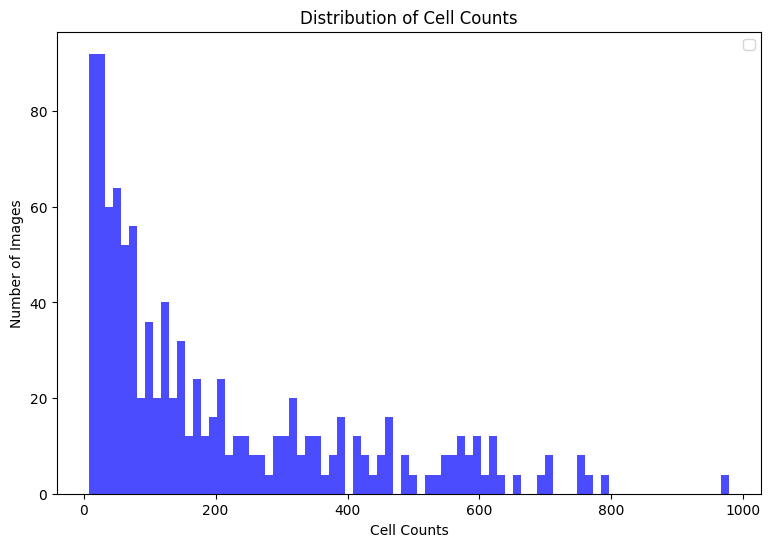

In [ ]:
# Create histograms
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
all_data = train_cell_counts + val_cell_counts + test_cell_counts


plt.hist(all_data, bins=80, density=False, alpha=0.7, color='blue')
#plt.hist(train_cell_counts, bins=60, density=False, alpha=0.7, color='red', label="Training")
#plt.hist(val_cell_counts, bins=60, density=False, alpha=0.7, color='orange', label="Validation")
#plt.hist(test_cell_counts, bins=60, density=False, alpha=0.7, color='green', label="Testing")
plt.title("Distribution of Cell Counts")
plt.xlabel("Cell Counts")
plt.ylabel("Number of Images")
plt.legend()


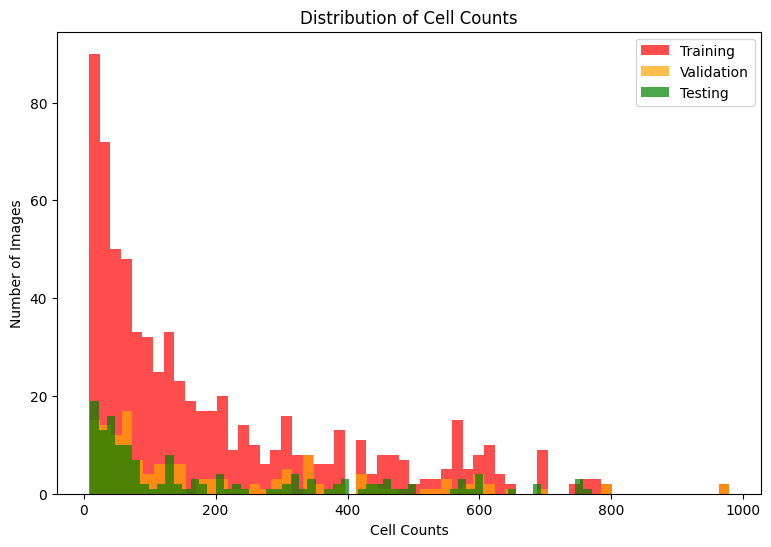

In [ ]:
# Create histograms
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

plt.hist(train_cell_counts, bins=60, density=False, alpha=0.7, color='red', label="Training")
plt.hist(val_cell_counts, bins=60, density=False, alpha=0.7, color='orange', label="Validation")
plt.hist(test_cell_counts, bins=60, density=False, alpha=0.7, color='green', label="Testing")
plt.title("Distribution of Cell Counts")
plt.xlabel("Cell Counts")
plt.ylabel("Number of Images")
plt.legend()

VGG16 Model

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class VGG16Regression(nn.Module):
    def __init__(self):
        super(VGG16Regression, self).__init__()
        # Load pre-trained VGG16 model
        self.vgg16 = models.vgg16(pretrained=True).features

        # Freeze the pre-trained layers
        for param in self.vgg16.parameters():
            param.requires_grad = False

        # Custom layers for regression
        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        x = self.vgg16(x)
        x = self.regressor(x)
        return x

# Instantiate the model
vgg16 = VGG16Regression()

loss_function = nn.MSELoss()
mae = nn.L1Loss()
optimizer = torch.optim.Adam(vgg16.regressor.parameters(), lr=0.001)



# def norm_mse(y_pred, y_true):
#     return torch.mean((((y_pred - y_true) ** 2)/y_pred))



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 81.2MB/s]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# Lists to store metrics
train_losses = []
train_maes = []
val_losses = []
val_maes = []

# Early stopping parameters
early_stopping_patience = 10
epochs_no_improve = 0
min_val_loss = float('inf')

num_epochs = 500

for epoch in range(num_epochs):
    # Training Phase
    vgg16.train()
    running_loss = 0.0
    running_mae = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_mae += mae(outputs, targets).item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_mae = running_mae / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_maes.append(train_mae)

    # Validation Phase
    vgg16.eval()
    val_running_loss = 0.0
    val_running_mae = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.float().unsqueeze(1)

            outputs = vgg16(inputs)
            loss = loss_function(outputs, targets)

            val_running_loss += loss.item() * inputs.size(0)
            val_running_mae += mae(outputs, targets).item() * inputs.size(0)

    val_loss = val_running_loss / len(val_loader.dataset)
    val_mae = val_running_mae / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_maes.append(val_mae)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {train_loss:.4f} - '
          f'MAE: {train_mae:.4f} - '
          f'Val_Loss: {val_loss:.4f} - '
          f'Val_MAE: {val_mae:.4f}')

   # Early stopping check
    if val_loss < min_val_loss:
        epochs_no_improve = 0
        min_val_loss = val_loss
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print(f'Early stopping triggered after {epoch + 1} epochs!')
            break



Epoch [1/500], Loss: 59434.5341 - MAE: 159.5942 - Val_Loss: 51015.7425 - Val_MAE: 154.3941
Epoch [2/500], Loss: 34615.6017 - MAE: 143.1907 - Val_Loss: 36570.1443 - Val_MAE: 153.9643
Epoch [3/500], Loss: 25821.7254 - MAE: 125.5053 - Val_Loss: 27030.7414 - Val_MAE: 122.7064
Epoch [4/500], Loss: 18139.2606 - MAE: 102.9214 - Val_Loss: 18115.5457 - Val_MAE: 98.8849
Epoch [5/500], Loss: 12025.7533 - MAE: 80.6601 - Val_Loss: 12298.2450 - Val_MAE: 71.0677
Epoch [6/500], Loss: 8166.5013 - MAE: 61.3639 - Val_Loss: 8921.7138 - Val_MAE: 59.8429
Epoch [7/500], Loss: 6118.9538 - MAE: 51.6041 - Val_Loss: 7248.7191 - Val_MAE: 53.5120
Epoch [8/500], Loss: 4938.5790 - MAE: 46.2475 - Val_Loss: 6301.9524 - Val_MAE: 50.2017
Epoch [9/500], Loss: 4200.2075 - MAE: 42.7840 - Val_Loss: 5680.9102 - Val_MAE: 47.5471
Epoch [10/500], Loss: 3661.7381 - MAE: 39.9704 - Val_Loss: 5182.5462 - Val_MAE: 45.7218
Epoch [11/500], Loss: 3252.0638 - MAE: 38.1411 - Val_Loss: 4871.1985 - Val_MAE: 42.8624
Epoch [12/500], Loss: 29

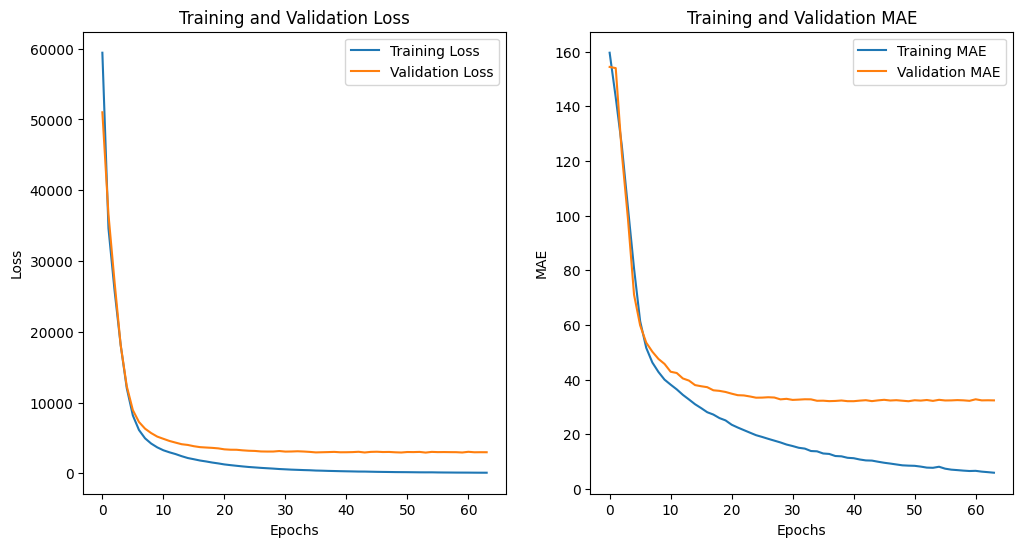

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Training MAE')
plt.plot(val_maes, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:

vgg16.eval()

# Initialize metrics
test_loss = 0.0
test_mae = 0.0

# No gradient updates needed
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.float().unsqueeze(1)

        # Forward pass
        outputs = vgg16(inputs)
        loss = loss_function(outputs, targets)

        # Update metrics
        test_loss += loss.item() * inputs.size(0)
        test_mae += mae(outputs, targets).item() * inputs.size(0)

# Calculate average loss and MAE
test_loss /= len(test_loader.dataset)
test_mae /= len(test_loader.dataset)

print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')


Test Loss: 1927.8922, Test MAE: 26.8952


In [ ]:
def calculate_acp(model, test_loader, device, threshold=0.05):
    model.eval()
    acp_counter = 0
    total_images = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.float().unsqueeze(1)
            outputs = model(inputs)
            absolute_diff = torch.abs(outputs - targets)
            within_threshold = absolute_diff <= (threshold * targets)

            acp_counter += torch.sum(within_threshold).item()
            total_images += targets.size(0)


    acp = acp_counter / total_images
    return acp

# Calculate ACP
acp = calculate_acp(vgg16, test_loader, device)
print(f"Accuracy within 5%: {acp * 100}%")


Accuracy within 5%: 26.666666666666668%
